In [ ]:
#Masukkan Packages
import pandas as pd
import numpy as np

#Packages untuk CgPGA
import random                                         #Package untuk mengacak gen, kondisi, dan waktu
!pip install deap                                     #Package deap untuk algoritma genetika
from deap import creator, base, tools, algorithms     #Package deap untuk algoritma genetika
import multiprocessing as mp                          #Package paralel multiprocessing
import time                                           #Package time untuk mengukur waktu eksekusi algoritma
from IPython.display import display                   #Package untuk menampilkan data dalam bentuk tabel
from functools import partial                         #Package untuk partial function

#Packcages visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#Membuat toolbox untuk algoritma genetika
toolbox = base.Toolbox()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.9 MB/s eta 0:00:00


In [ ]:
#Load data
data_path = '/content/data cj.csv'
data = pd.read_csv(data_path)

#Rename judul kolom gene
data.rename(columns={'Unnamed: 0': 'gene'}, inplace=True)

#Tampilan data
data.head()

,gene,GSM87853,GSM87854,GSM87855,GSM87856,GSM87857,GSM87858,GSM87859,GSM87860,GSM87861,...,GSM87863,GSM87864,GSM87865,GSM87866,GSM87867,GSM87868,GSM87869,GSM87870,GSM87871,GSM87872
0,203441_s_at,5.319959,5.145030,5.156829,5.204023,5.052460,5.372283,5.269172,5.102929,5.264280,...,4.681544,5.005195,5.011364,4.877754,5.083180,4.737713,4.844157,4.974575,4.820524,5.273465
1,207079_s_at,4.719460,5.195181,4.872684,4.923133,5.173821,4.933442,4.889897,4.940793,5.228775,...,5.421768,5.527628,5.366482,5.647594,5.277094,5.490923,5.584712,5.353018,5.227206,4.975867
2,209028_s_at,4.172195,5.164862,4.088757,4.654347,4.650524,4.413337,4.127987,4.912973,4.499611,...,5.421050,5.900931,5.644220,5.793670,5.430888,6.212029,6.294867,5.513391,5.403871,5.628150
3,207616_s_at,7.404797,7.553727,7.419913,7.526429,7.412688,7.456386,6.956558,7.419105,7.466188,...,7.962089,7.782093,7.911130,8.000149,7.650576,7.862242,8.106678,7.801706,7.742626,7.748190
4,222314_x_at,5.057203,4.748738,4.945797,4.842871,5.220696,5.202361,5.213037,5.202367,5.088150,...,5.043234,4.971485,4.859109,4.930047,5.096738,4.820829,4.646360,4.882646,5.219696,5.120720


In [ ]:
#Exploratory Data Analysis
data.describe()

,GSM87853,GSM87854,GSM87855,GSM87856,GSM87857,GSM87858,GSM87859,GSM87860,GSM87861,GSM87862,GSM87863,GSM87864,GSM87865,GSM87866,GSM87867,GSM87868,GSM87869,GSM87870,GSM87871,GSM87872
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,5.955704,6.037973,6.009769,6.015317,6.001856,5.930110,5.932628,5.999901,5.989588,5.978157,6.097776,6.104473,6.082275,6.109627,6.070987,6.116533,6.162282,6.092473,6.043830,6.036393
std,1.494625,1.524759,1.525497,1.520872,1.474805,1.439496,1.463396,1.461449,1.486364,1.423745,1.551585,1.555472,1.530420,1.554467,1.490293,1.553485,1.586108,1.547303,1.491596,1.440233
min,2.524461,2.540286,2.592698,2.616981,2.538836,2.595646,2.544465,2.686129,2.620007,2.554072,2.566865,2.747369,2.600519,2.658083,2.670639,2.818593,2.804430,2.835117,2.639035,2.691680
25%,4.929096,4.950066,4.934248,4.947324,4.958469,4.937426,4.931640,4.979529,4.959940,4.978688,4.967684,4.961889,4.974042,4.974697,5.004141,4.964726,4.988601,4.962263,4.984793,5.025676
50%,5.804907,5.844830,5.829553,5.829052,5.845926,5.810965,5.798447,5.849399,5.834630,5.830019,5.894048,5.913988,5.880936,5.903620,5.904071,5.925370,5.947202,5.891021,5.864904,5.877293
75%,6.810006,6.906262,6.880268,6.874937,6.848139,6.729663,6.752027,6.806089,6.800271,6.767049,6.978444,7.018548,6.953990,7.012517,6.921113,7.009124,7.100735,6.980652,6.857802,6.818213
max,12.931222,13.141017,13.044361,13.170726,12.903158,12.596658,12.745257,12.948765,13.056576,12.777296,13.114048,13.108638,13.268963,13.179712,13.058929,13.193279,13.103212,13.198367,13.252340,13.004765


In [ ]:
#Pemetaan Data

#Mendefinisikan code GSM dan memetakan ke tabel yang terstruktur
gsm_to_condition_time = {
    'GSM87853': ('grape_juice', 0), 'GSM87854': ('grape_juice', 1),
    'GSM87855': ('grape_juice', 2), 'GSM87856': ('grape_juice', 4), 'GSM87857': ('grape_juice', 12),
    'GSM87858': ('wine', 0), 'GSM87859': ('wine', 1),
    'GSM87860': ('wine', 2), 'GSM87861': ('wine', 4), 'GSM87862': ('wine', 12),
    'GSM87863': ('alcohol', 0), 'GSM87864': ('alcohol', 1),
    'GSM87865': ('alcohol', 2), 'GSM87866': ('alcohol', 4), 'GSM87867': ('alcohol', 12),
    'GSM87868': ('water', 0), 'GSM87869': ('water', 1),
    'GSM87870': ('water', 2), 'GSM87871': ('water', 4), 'GSM87872': ('water', 12)
}
#Memetakan ke tabel yang terstruktur
reshaped_data_list = []

for gsm_code, (condition, time) in gsm_to_condition_time.items():
    temp_df = data[['gene', gsm_code]].copy()
    temp_df.rename(columns={gsm_code: 'expression'}, inplace=True)
    temp_df['condition'] = condition
    temp_df['time'] = time
    reshaped_data_list.append(temp_df)

reshaped_data = pd.concat(reshaped_data_list, ignore_index=True)

#Tampilan data yang sudah terstruktur
reshaped_data.head()

,gene,expression,condition,time
0,203441_s_at,5.319959,grape_juice,0
1,207079_s_at,4.719460,grape_juice,0
2,209028_s_at,4.172195,grape_juice,0
3,207616_s_at,7.404797,grape_juice,0
4,222314_x_at,5.057203,grape_juice,0


In [ ]:
#Membentuk array ekspresi gen tiga dimensi
def reshape_to_array(data):
    genes = data['gene'].unique()
    conditions = data['condition'].unique()
    times = data['time'].unique()

    gene_indices = {gene: idx for idx, gene in enumerate(genes)}
    condition_indices = {condition: idx for idx, condition in enumerate(conditions)}
    time_indices = {time: idx for idx, time in enumerate(times)}

    tensor = np.full((len(genes), len(conditions), len(times)), np.nan, dtype=np.float32)

    # Pivot table to reshape data and fill tensor
    pivot_table = data.pivot_table(index=['gene', 'condition', 'time'],
                                   values='expression',
                                   aggfunc=np.nanmean).reset_index()

    for _, row in pivot_table.iterrows():
        i = gene_indices[row['gene']]
        j = condition_indices[row['condition']]
        k = time_indices[row['time']]
        tensor[i, j, k] = row['expression']

    return tensor

expression_array = reshape_to_array(reshaped_data)

#Tampilan array ekspresi gen tiga dimensi
expression_array

array([[[5.319959 , 5.1450295, 5.1568294, 5.2040234, 5.0524597],
        [5.372283 , 5.2691717, 5.102929 , 5.2642803, 5.191227 ],
        [4.6815443, 5.005195 , 5.0113635, 4.877754 , 5.0831804],
        [4.7377133, 4.8441567, 4.974575 , 4.8205237, 5.273465 ]],

       [[4.7194595, 5.1951814, 4.872684 , 4.923133 , 5.1738214],
        [4.933442 , 4.8898973, 4.940793 , 5.228775 , 5.163137 ],
        [5.421768 , 5.5276284, 5.3664823, 5.6475945, 5.2770934],
        [5.490923 , 5.584712 , 5.3530183, 5.227206 , 4.9758673]],

       [[4.172195 , 5.164862 , 4.0887566, 4.654347 , 4.6505237],
        [4.4133368, 4.1279874, 4.912973 , 4.499611 , 5.1341505],
        [5.4210496, 5.9009304, 5.6442194, 5.7936697, 5.4308877],
        [6.212029 , 6.2948675, 5.5133915, 5.403871 , 5.6281505]],

       ...,

       [[6.477819 , 6.1685047, 6.495688 , 6.2771244, 6.5800056],
        [6.6317277, 6.614101 , 6.5384216, 6.4976463, 6.4927764],
        [6.183316 , 6.06293  , 6.1596284, 6.263087 , 6.281726 ],
      

In [ ]:
#Cek dimensi array
expression_array.shape

(6321, 4, 5)

In [ ]:
#List Parameter CgPGA

#Dimensi data
num_genes = 6321    #total gen dalam data
num_conditions = 4  #total kondisi dalam data
num_times = 5       #total waktu dalam data

#Weights (Bobot tricluster) untuk fungsi fitness
w_g = 0.8     #Bobot gen                          #mengidentifikasi dan mempertahankan gen-gen yang paling relevan atau signifikan, 0,8 agar lebih banyak gen dapat berpartisipasi dalam proses seleksi
w_c = 0.1     #Bobot kondisi
w_t = 0.1     #Bobot Waktu

#Distinction (Bobot kekhasan tricluster) untuk fungsi fitness
w_dg = 0.8    #Bobot distinction gen              #memastikan bahwa solusi yang dihasilkan mencakup berbagai kemungkinan variasi gen sehingga meningkatkan kualitas solusi akhir
w_dc = 0.1    #Bobot distinction kondisi
w_dt = 0.1    #Bobot distinction waktu

#Probabilitas crossover
cxpb = 0.8                  #probabilitas Crossover biasanya beroperasi dengan probabilitas tinggi, yaitu antara 0.6 hingga 0.9.

#Probabilitas Mutasi
mutpb = 0.3               #probabilitas mutasi biasanya harus diatur cukup rendah

#Probabilitas memilih gen, kondisi, dan waktu secara acak untuk membangun individu (tricluster)
gs1 = 0.7     #gen bit 0 diaktifkan
gs2 = 0.3     #gen bit 1 diaktifkan
cs1 = 0.4     #kondisi bit 0 diaktifkan
cs2 = 0.6     #kondisi bit 1 diaktifkan
ts1 = 0.4     #kondisi bit 0 diaktifkan
ts2 = 0.6     #kondisi bit 1 diaktifkan

#Ukuran individu yang mengikuti seleksi turnamen
tournsize = 3

#Probabilitas mutasi flip-bit
indpb = 0.5

#Jumlah pulau (Menggunakan jumlah logical processor perangkat)
num_islands = 6

#Jumlah tricluster yang dihasilkan
num_best_individuals = 10

#Ukuran populasi
pop_size = 36

#Jumlah generasi
ngen = 6

#Interval migrasi
migration_interval = 4

In [ ]:
#Membangun sebuah individu melalui pengacakan gen, kondisi, waktu
def create_individual():
    gene_selection = np.random.choice([0, 1], size=num_genes, p=[gs1, gs2])                 #Pengacakan gen
    condition_selection = np.random.choice([0, 1], size=num_conditions, p=[cs1, cs2])       #Pengacakan kondisi
    time_selection = np.random.choice([0, 1], size=num_times, p=[ts1, ts2])                 #Pengacakan waktu
    individual = creator.Individual([gene_selection, condition_selection, time_selection])
    individual.selected_conditions = condition_selection  # Asumsikan ini adalah pilihan kondisi
    individual.selected_times = time_selection  # Asumsikan ini adalah pilihan waktu
    return individual


#Crossover Dua Titik
def custom_cxTwoPoint(ind1, ind2):
    for i in range(3):
        tools.cxTwoPoint(ind1[i], ind2[i])
    return ind1, ind2

#Mutasi Flip-Bit
def custom_mutFlipBit(individual, indpb):
    for i in range(3):
        tools.mutFlipBit(individual[i], indpb=indpb)
    return individual,


#Fungsi Fitness
#Menghitung MSR
def calculate_msr(array):
    I, J, K = array.shape
    a_iJK = np.nanmean(array, axis=(1, 2), keepdims=True)  #Rata-rata gen sepanjang kondisi dan waktu
    a_IjK = np.nanmean(array, axis=(0, 2), keepdims=True)  #Rata-rata kondisi sepanjang gen dan waktu
    a_IJk = np.nanmean(array, axis=(0, 1), keepdims=True)  #Rata-rata waktu sepanjang gen dan kondisi
    a_IJK = np.nanmean(array, keepdims=True)               #Rata-rata total

    a_hat = a_iJK + a_IjK + a_IJk - 2 * a_IJK     #Nilai perkiraan data
    r_ijk = array - a_hat                         #Nilai residu (Nilai aktual data-Nilai perkiraan)
    msr = np.nanmean(r_ijk ** 2)                  #Menghitung nilai MSR

    return msr

def fitness_func(individual, expression_array):
    selected_genes = np.where(np.atleast_1d(individual[0]) == 1)[0]          # Mengambil gen yang terpilih (Bit 1)
    selected_conditions = np.where(np.atleast_1d(individual[1]) == 1)[0]     # Mengambil kondisi yang terpilih (Bit 1)
    selected_times = np.where(np.atleast_1d(individual[2]) == 1)[0]          # Mengambil waktu yang terpilih (Bit 1)

    # Memastikan gen, kondisi, dan waktu yang terpilih berada di rentang data asli
    if (len(selected_genes) == 0 or len(selected_conditions) == 0 or len(selected_times) == 0 or
        max(selected_conditions) >= expression_array.shape[1] or
        max(selected_times) >= expression_array.shape[2]):
        return (float('inf'),)

    # Mengambil nilai ekspresi gen berdasarkan indeks dari gen, kondisi, dan waktu yang terpilih
    selected_array = expression_array[np.ix_(selected_genes, selected_conditions, selected_times)]

    # Menghitung MSR
    MSR = calculate_msr(selected_array)

    # Menghitung Weights
    G_i = len(selected_genes)                       # Total koordinat Gen terpilih
    C_i = len(selected_conditions)                  # Total koordinat Kondisi terpilih
    T_i = len(selected_times)                       # Total koordinat Waktu terpilih
    Weights = G_i * w_g + C_i * w_c + T_i * w_t     # Menghitung Weights

    # Menghitung Distinction
    DT_g = expression_array.shape[0] - G_i          # Total koordinat Gen yang tidak terpilih
    CT_c = expression_array.shape[1] - C_i          # Total koordinat Kondisi yang tidak terpilih
    DT_t = expression_array.shape[2] - T_i          # Total koordinat Waktu yang tidak terpilih
    Distinction = (DT_g / G_i) * w_dg + (CT_c / C_i) * w_dc + (DT_t / T_i) * w_dt     # Menghitung Distinction

    # Menghitung Fitness score
    F_msr = 1 - (MSR - Weights - Distinction)
    return (F_msr,)


#Membuat toolbox untuk menyimpan dan konfigurasi berbagai elemen dan operator dalam Algoritma Genetika

#Mendefinisikan kelas Fitness dan Individual
creator.create("FitnessMax", base.Fitness, weights=(1.0,))     #Tujuan optimasi yaitu memaksimumkan fitness score
creator.create("Individual", list, fitness=creator.FitnessMax)  #Setiap individu adalah daftar yang memiliki fitness score

#Menghasilkan nilai biner (0 atau 1) secara acak
toolbox.register("attr_bool", np.random.randint, 0, 2)

#Menggunakan seleksi turnamen dengan parameter ukuran turnamen (tournsize)
toolbox.register("select", tools.selTournament, tournsize=tournsize)

#Membuat individu menggunakan fungsi create_individual
toolbox.register("individual", create_individual)

#Membuat populasi dengan mengulang pembuatan individu
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

#Mengevaluasi individu menggunakan fungsi fitness_func
toolbox.register("evaluate", partial(fitness_func, expression_array=expression_array))

#Melakukan crossover dua titik menggunakan fungsi custom_cxTwoPoint
toolbox.register("mate", custom_cxTwoPoint)

#Melakukan mutasi flip-bit menggunakan fungsi custom_mutFlipBit dengan probabilitas mutasi flip-bit (indpb)
toolbox.register("mutate", custom_mutFlipBit, indpb=indpb)


# Fungsi Migrasi
def migrate(island, all_islands, island_index):
    # Menemukan individu terbaik (fitness score tertinggi) di pulau saat ini
    best = max(island, key=lambda ind: ind.fitness.values[0])

    # Menentukan pulau tujuan migrasi
    all_other_islands_indices = [i for i in range(len(all_islands)) if i != island_index]  # Membuat list index pulau target migrasi

    # Memilih pulau tujuan migrasi secara acak dari daftar pulau
    if all_other_islands_indices:
        target_island_index = random.choice(all_other_islands_indices)
        target_island = all_islands[target_island_index]

        # Memastikan setiap individu di pulau tujuan memiliki fitness score
        for ind in target_island:
            if not ind.fitness.valid:
                ind.fitness.values = toolbox.evaluate(ind)     # Jika tidak valid, evaluasi ulang individu

        # Menemukan individu terburuk (fitness score terendah) di pulau tujuan berdasarkan fitness score
        worst_in_target = min(target_island, key=lambda ind: ind.fitness.values[0])

        # Memastikan fitness score individu terbaik dari pulau saat ini lebih baik daripada individu terburuk di pulau tujuan
        if best.fitness.values[0] < worst_in_target.fitness.values[0]:
            # Menukar individu terburuk di pulau tujuan dengan individu terbaik dari pulau saat ini
            best_index_in_island = next(i for i, ind in enumerate(island) if ind is best)
            worst_index_in_target_island = next(i for i, ind in enumerate(target_island) if ind is worst_in_target)
            island[best_index_in_island], target_island[worst_index_in_target_island] = worst_in_target, best


def run_algorithm(island, ngen, migration_interval, island_index, all_islands, expression_array):
    #Evaluasi populasi yang baru diterima setiap pulau
  for ind in island:
    if not ind.fitness.valid:
      ind.fitness.values = toolbox.evaluate(ind)

  for gen in range(ngen):     #Loop berjalan selama jumlah generasi yang ditentukan (ngen)
    #Seleksi turnamen untuk memilih parents
    parents = toolbox.select(island, len(island))

    offspring = []
    #Menghasilkan keturunan dengan crossover
    for parent1, parent2 in zip(parents[::2], parents[1::2]):
      if random.random() < cxpb:
        child1, child2 = toolbox.clone(parent1), toolbox.clone(parent2)
        toolbox.mate(child1, child2)
        del child1.fitness.values
        del child2.fitness.values
        offspring.extend([child1, child2])
      else:
        offspring.extend([toolbox.clone(parent1), toolbox.clone(parent2)])

    #Mutasi pada keturunan
    for child in offspring:
      if random.random() < mutpb:
        toolbox.mutate(child)
        del child.fitness.values

    #Evaluasi individu baru
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
      ind.fitness.values = fit

    #Gabungkan keturunan baru dengan populasi pulau saat ini
    island[:] = toolbox.select(island + offspring, len(island))

    #Menjalankan migrasi apabila kriteria migrasi tercapai
    if gen % migration_interval == 0 and gen > 0:
      migrate(island, all_islands, island_index)

  #Memilih individu terbaik di pulau jika generasi saat ini adalah generasi maksimum
  best_ind = max(island, key=lambda ind: ind.fitness.values[0])

  return best_ind     #Mengembalikan individu terbaik dari pulau saat ini


def parallel_coarse_grained_ga(expression_array, pop_size, num_islands, ngen, migration_interval, num_best_individuals):
    final_best_individuals = []

    while len(final_best_individuals) < num_best_individuals:
        # Membuat populasi awal dengan parameter ukuran populasi (pop_size)
        pop = toolbox.population(n=pop_size)

        # Membagi populasi ke dalam beberapa pulau
        islands = [pop[i::num_islands] for i in range(num_islands)]  # Setiap pulau mendapatkan subpopulasi dengan cara mengambil indeks pulau

        # Menyimpan informasi sebuah pulau, jumlah generasi, interval migrasi, indeks pulau, daftar semua pulau, dan nilai ekspresi gen
        args = [(island, ngen, migration_interval, i, islands, expression_array) for i, island in enumerate(islands)]

        # Menjalankan algoritma secara paralel sesuai dengan jumlah pulau
        with mp.Pool(processes=num_islands) as pool:
            results = pool.starmap(run_algorithm, args)

        # Menggabungkan individu (terbaik) dari setiap pulau
        combined_population = [ind for ind in results]

        # Memilih satu individu terbaik dari seluruh populasi
        best_individual = max(combined_population, key=lambda ind: ind.fitness.values[0])
        final_best_individuals.append(best_individual)

    return final_best_individuals  # Mengembalikan 10 individu terbaik (tricluster)

# Hitung Speedup

In [ ]:
import time
#Mengukur waktu eksekusi paralel
start_time = time.time()
final_population_parallel = parallel_coarse_grained_ga(expression_array, pop_size, num_islands, ngen, migration_interval, num_best_individuals)
end_time = time.time()
T_parallel = end_time - start_time
print(f"Parallel Execution Time: {T_parallel} seconds")

Parallel Execution Time: 7.76085352897644 seconds


In [ ]:
def run_serial(expression_array, pop_size, ngen, num_best_individuals):
  final_best_individuals = []

  while len(final_best_individuals) < num_best_individuals:
    #Pembuatan populasi awal
    pop = toolbox.population(n=pop_size)

    for gen in range(ngen):     #Loop berjalan selama jumlah generasi yang ditentukan (ngen)
      #Evaluasi populasi
      for ind in pop:
        if not ind.fitness.valid:
          ind.fitness.values = toolbox.evaluate(ind)

        #Seleksi turnamen untuk memilih parents
        parents = toolbox.select(pop, len(pop))
        offspring = []

        #Menghasilkan keturunan dengan crossover dan mutasi
        for parent1, parent2 in zip(parents[::2], parents[1::2]):
            if random.random() < cxpb:
                child1, child2 = toolbox.clone(parent1), toolbox.clone(parent2)
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
                offspring.extend([child1, child2])
            else:
                offspring.extend([toolbox.clone(parent1), toolbox.clone(parent2)])

        #Mutasi pada keturunan
        for child in offspring:
            if random.random() < mutpb:
                toolbox.mutate(child)
                del child.fitness.values

        #Evaluasi individu baru
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        #Gabungkan keturunan baru dengan populasi saat ini
        pop[:] = toolbox.select(pop + offspring, len(pop))

    # Memilih individu terbaik jika generasi saat ini adalah generasi maksimum
    best_individual = max(pop, key=lambda ind: ind.fitness.values[0])
    final_best_individuals.append(best_individual)

  return final_best_individuals     # Mengembalikan individu terbaik


# Mengukur waktu eksekusi serial
start_time = time.time()
final_population_serial = run_serial(expression_array, pop_size, ngen, num_best_individuals)
end_time = time.time()
T_serial = end_time - start_time
print(f"Serial Execution Time: {T_serial} seconds")

Serial Execution Time: 111.95218968391418 seconds


In [ ]:
#Menghitung speedup
speedup = T_serial / T_parallel
print(f"Speedup: {speedup}")

Speedup: 14.425241922930516


In [ ]:
#Menghitung parallel efficiency
parallel_efficiency = speedup / num_islands
print(f"Parallel Efficiency: {parallel_efficiency}")

Parallel Efficiency: 2.404206987155086


# Hasil Triclustering

In [ ]:
#Jalankan code CgPGA
final_population = parallel_coarse_grained_ga(expression_array, pop_size, num_islands, ngen, migration_interval, num_best_individuals)

Exception ignored in: <function _after_fork at 0x781407469b40>
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1635, in _after_fork
    thread._reset_internal_locks(False)
  File "/usr/lib/python3.10/threading.py", line 888, in _reset_internal_locks
    self._started._at_fork_reinit()
  File "/usr/lib/python3.10/threading.py", line 551, in _at_fork_reinit
    self._cond._at_fork_reinit()
  File "/usr/lib/python3.10/threading.py", line 262, in _at_fork_reinit
    self._waiters.clear()
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
#Menampilkan populasi tricluster
final_population

[[array([1, 1, 1, ..., 1, 0, 1]), array([1, 1, 0, 0]), array([0, 0, 1, 0, 0])],
 [array([0, 0, 1, ..., 1, 1, 1]), array([0, 0, 1, 1]), array([1, 1, 0, 1, 1])],
 [array([1, 0, 1, ..., 1, 0, 0]), array([1, 1, 1, 1]), array([0, 1, 0, 0, 0])],
 [array([1, 1, 0, ..., 1, 0, 0]), array([1, 0, 1, 1]), array([0, 0, 0, 1, 0])],
 [array([1, 0, 0, ..., 0, 0, 1]), array([0, 1, 0, 0]), array([0, 1, 1, 0, 0])],
 [array([1, 0, 0, ..., 0, 1, 1]), array([1, 0, 1, 1]), array([0, 0, 0, 0, 1])],
 [array([1, 0, 1, ..., 0, 0, 1]), array([1, 1, 1, 0]), array([1, 1, 0, 0, 1])],
 [array([0, 1, 0, ..., 0, 0, 0]), array([1, 1, 0, 1]), array([1, 0, 1, 0, 0])],
 [array([0, 0, 1, ..., 1, 0, 0]), array([0, 1, 0, 0]), array([0, 0, 0, 1, 1])],
 [array([0, 1, 1, ..., 1, 1, 1]), array([0, 1, 1, 0]), array([0, 0, 0, 0, 1])]]

In [ ]:
#Menampilkan detail hasil triclustering
def display_and_save_triclustering_results(triclusters, expression_array, reshaped_data, output_file_prefix='tricluster'):
    results = []
    for idx, individual in enumerate(triclusters):
        selected_genes_idx = np.where(np.atleast_1d(individual[0]) == 1)[0]
        selected_conditions_idx = np.where(np.atleast_1d(individual[1]) == 1)[0]
        selected_times_idx = np.where(np.atleast_1d(individual[2]) == 1)[0]

        selected_genes = reshaped_data['gene'].unique()[selected_genes_idx]
        selected_conditions = reshaped_data['condition'].unique()[selected_conditions_idx]
        selected_times = reshaped_data['time'].unique()[selected_times_idx]

        if len(selected_genes) == 0 or len(selected_conditions) == 0 or len(selected_times) == 0:
            msr = np.nan
            fitness_score = np.nan
        else:
            msr = calculate_msr(expression_array[np.ix_(selected_genes_idx, selected_conditions_idx, selected_times_idx)])
            fitness_score = fitness_func(individual, expression_array)[0]

        # Menyimpan nama gen ke file CSV
        genes_df = pd.DataFrame(selected_genes, columns=['gene'])
        genes_df.to_csv(f'{output_file_prefix}_{idx+1}.csv', index=False)

        results.append({
            'Tricluster': idx + 1,
            'Num Genes': len(selected_genes),
            'Conditions': list(selected_conditions),
            'Times': list(selected_times),
            'MSR': msr,
            'Fitness Score': fitness_score
        })

        print(f"Tricluster {idx+1}")
        print(f"Genes: {list(selected_genes)}")
        print(f"Conditions: {list(selected_conditions)}")
        print(f"Times: {list(selected_times)}")
        print()

    results_df = pd.DataFrame(results)
    display(results_df)
    return results_df

#Tampilkan dan simpan detail hasil triclustering
results_df = display_and_save_triclustering_results(final_population, expression_array, reshaped_data)

Tricluster 1
Genes: ['203441_s_at', '207079_s_at', '209028_s_at', '207616_s_at', '216224_s_at', '213740_s_at', '211532_x_at', '219442_at', '209771_x_at', '222090_at', '202455_at', '206866_at', '205042_at', '210212_x_at', '215160_x_at', '212597_s_at', '202807_s_at', '215639_at', '205088_at', '209015_s_at', '215009_s_at', '213569_at', '201664_at', '208460_at', '209769_s_at', '217946_s_at', '203105_s_at', '209246_at', '203880_at', '221162_at', '213667_at', '219625_s_at', '207172_s_at', '208736_at', '201954_at', '200972_at', '201490_s_at', '210578_at', '213513_x_at', '204072_s_at', '217738_at', '206517_at', '221953_s_at', '214092_x_at', '213241_at', '212706_at', '201443_s_at', '218589_at', '209936_at', '213690_s_at', '217030_at', '222278_at', '202603_at', '206463_s_at', '206331_at', '210142_x_at', '201584_s_at', '212296_at', '211670_x_at', '201906_s_at', '202241_at', '216788_at', '206761_at', '202122_s_at', '209215_at', '212799_at', '208206_s_at', '208766_s_at', '212604_at', '201225_s_at',

,Tricluster,Num Genes,Conditions,Times,MSR,Fitness Score
0,1,3184,"[grape_juice, wine]",[2],0.020157,2549.768034
1,2,3163,"[alcohol, water]","[0, 1, 4, 12]",0.036133,2532.887602
2,3,3183,"[grape_juice, wine, alcohol, water]",[1],0.072522,2549.016168
3,4,3166,"[grape_juice, alcohol, water]",[4],0.035303,2535.395251
4,5,3207,[wine],"[1, 2]",0.020775,2568.106026
5,6,3196,"[grape_juice, alcohol, water]",[12],0.029104,2559.386458
6,7,3184,"[grape_juice, wine, alcohol]","[0, 1, 12]",0.058312,2549.629879
7,8,3190,"[grape_juice, wine, water]","[0, 2]",0.074204,2554.394333
8,9,3140,[wine],"[4, 12]",0.017701,2514.542745
9,10,3167,"[wine, alcohol]",[12],0.022149,2536.174567


# Visualisasi Triclustering

<ipython-input-106-dddd7e080295>:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(subset['gene'], rotation=90)


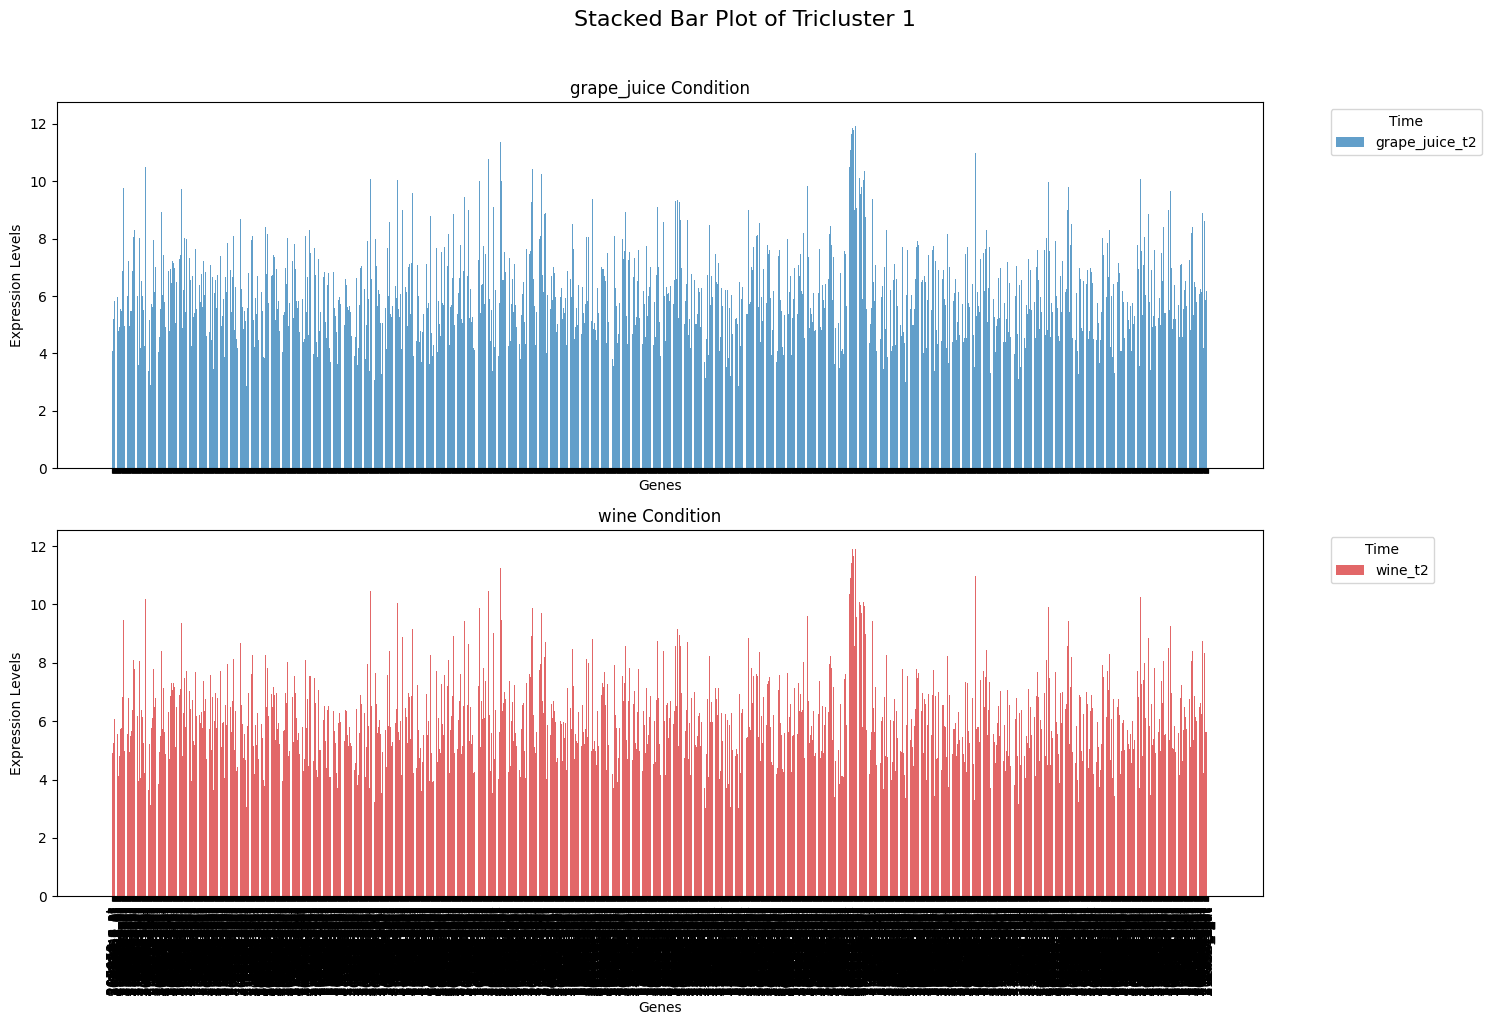

<ipython-input-106-dddd7e080295>:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(subset['gene'], rotation=90)


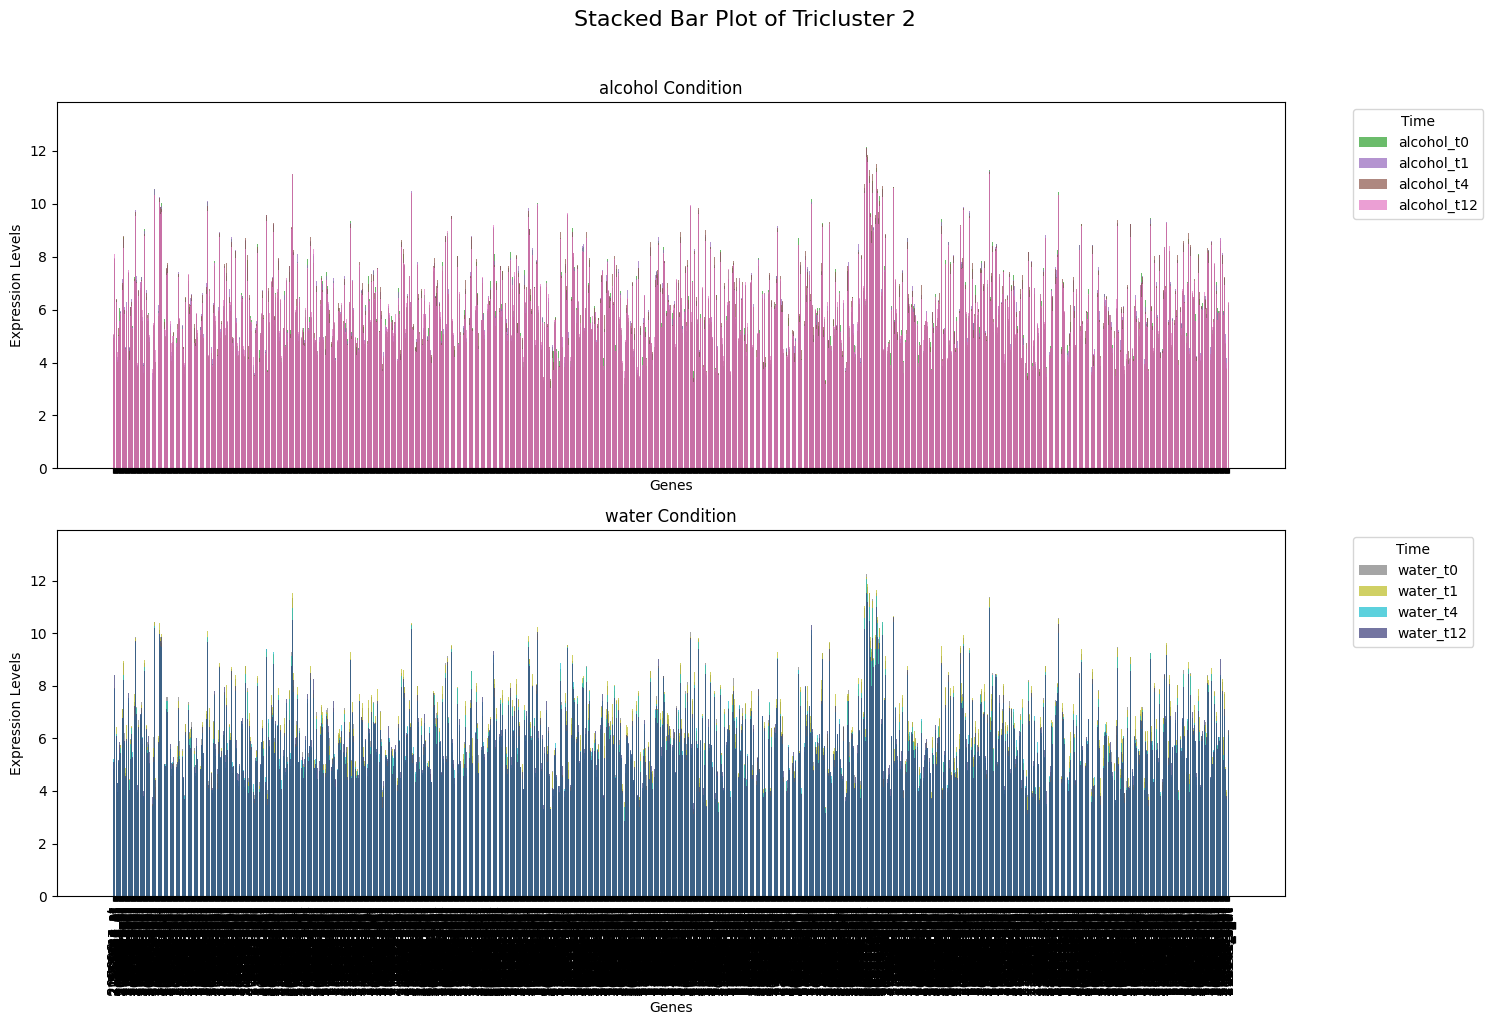

In [ ]:
#Barplot

def plot_bar_for_tricluster(triclusters, expression_array, reshaped_data):
    # Menentukan palet warna gelap
    dark_colors = ['#1f77b4', '#d62728', '#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#393b79']
    used_color_indices = set()

    for idx, individual in enumerate(triclusters):
        selected_genes_idx = np.where(np.atleast_1d(individual[0]) == 1)[0]
        selected_conditions_idx = np.where(np.atleast_1d(individual[1]) == 1)[0]
        selected_times_idx = np.where(np.atleast_1d(individual[2]) == 1)[0]

        selected_genes = reshaped_data['gene'].unique()[selected_genes_idx]
        selected_conditions = reshaped_data['condition'].unique()[selected_conditions_idx]
        selected_times = reshaped_data['time'].unique()[selected_times_idx]

        if len(selected_genes) == 0 or len(selected_conditions) == 0 or len(selected_times) == 0:
            continue

        # Mengambil data ekspresi untuk gen, kondisi, dan waktu yang terpilih
        selected_array = expression_array[np.ix_(selected_genes_idx, selected_conditions_idx, selected_times_idx)]

        # Membentuk DataFrame untuk plotting
        plot_data = pd.DataFrame(selected_array.reshape(len(selected_genes), -1),
                                 index=selected_genes,
                                 columns=[f"{cond}_t{time}" for cond in selected_conditions for time in selected_times])

        plot_data.reset_index(inplace=True)
        plot_data.rename(columns={'index': 'gene'}, inplace=True)

        plot_data = plot_data.melt(id_vars='gene', var_name='condition_time', value_name='expression')

        # Membuat plot terpisah untuk setiap kondisi yang tersedia dalam tricluster
        unique_conditions = reshaped_data['condition'].unique()[selected_conditions_idx]
        n_conditions = len(unique_conditions)

        fig, axs = plt.subplots(n_conditions, 1, figsize=(15, 5 * n_conditions), sharex=True)

        if n_conditions == 1:
            axs = [axs]

        for ax, condition in zip(axs, unique_conditions):
            condition_data = plot_data[plot_data['condition_time'].str.contains(condition)]
            for i, time in enumerate(selected_times):
                subset = condition_data[condition_data['condition_time'].str.endswith(f"_t{time}")]
                if not subset.empty:
                    color_index = i % len(dark_colors)
                    while color_index in used_color_indices:
                        color_index = (color_index + 1) % len(dark_colors)
                    used_color_indices.add(color_index)
                    color = dark_colors[color_index]
                    ax.bar(subset['gene'], subset['expression'], color=color, label=f"{condition}_t{time}", alpha=0.7)

            ax.set_title(f"{condition} Condition")
            ax.set_xlabel("Genes")
            ax.set_ylabel("Expression Levels")
            ax.legend(title='Time', bbox_to_anchor=(1.05, 1), loc='upper left')
            ax.set_xticklabels(subset['gene'], rotation=90)

        plt.suptitle(f"Stacked Bar Plot of Tricluster {idx+1}", y=1.02, fontsize=16)
        plt.tight_layout()
        plt.show()

# Jalankan barplot untuk setiap tricluster
plot_bar_for_tricluster(final_population, expression_array, reshaped_data)